In [1]:
import pandas as pd

df = pd.read_csv(r"C:\Users\LENOVO\Downloads\StudentsPerformance (1).csv")

print("First 5 rows of dataset:")
print(df.head())
print("\nColumns:")
print(df.columns)

First 5 rows of dataset:
   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  

Columns:
Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', '

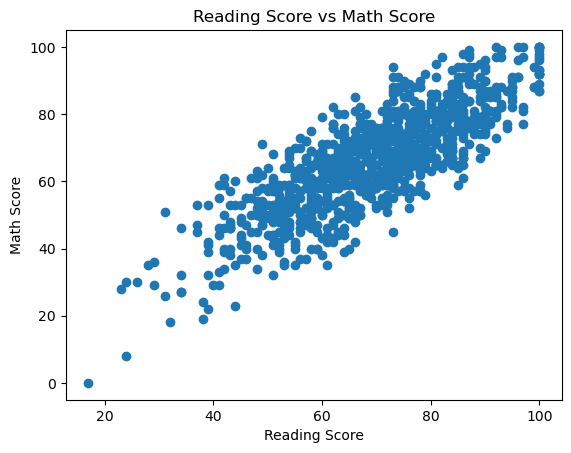

In [2]:
# Basic Visualization
# Working: Reading aur Math score ka relation dekhne ke liye scatter plot banaya
import matplotlib.pyplot as plt

plt.scatter(df['reading score'], df['math score'])
plt.xlabel("Reading Score")
plt.ylabel("Math Score")
plt.title("Reading Score vs Math Score")
plt.show()

In [3]:
# Prepare data for simple Linear Regression
# Working: Independent variables (Reading, Writing) aur dependent variable (Math) select kiya.
# Fir data ko train aur test set me split kiya
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df[['reading score', 'writing score']]
y = df['math score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [4]:
# Show coefficients
# Working: Model ka intercept aur coefficients nikale jo batate hain ke Reading aur Writing ka Math par kitna effect hai

print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)


Intercept: 7.85940588782988
Coefficients: [0.57555997 0.27176146]


In [5]:
# Make predictions
# Working: Test data par prediction kiya aur actual values ke sath compare kiya

y_pred = model.predict(X_test)
print("\nPredicted Math Scores (first 5):", y_pred[:5])
print("Actual Math Scores (first 5):", list(y_test[:5]))


Predicted Math Scores (first 5): [80.18552589 65.6849504  69.44210877 72.01611012 76.82827724]
Actual Math Scores (first 5): [91, 53, 80, 74, 84]


In [6]:
# Evaluate model performance
# Working: R² score nikala jo batata hai ke model kitna accurate hai. Jitna zyada value ho utna acha model fit hai

from sklearn.metrics import r2_score
print("\nR² Score (without categorical features):", r2_score(y_test, y_pred))


R² Score (without categorical features): 0.6825697127424625


In [7]:

# Advanced model with categorical features
# Working: Yahan categorical features (gender, race/ethnicity, etc.) ko One-Hot Encoding ke through numeric banaya
# Fir unhe reading aur writing ke sath combine karke dobara model train kiya
from sklearn.preprocessing import OneHotEncoder
import numpy as np

cat_cols = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']

encoder = OneHotEncoder(drop='first', sparse_output=False)
cat_data = encoder.fit_transform(df[cat_cols])

X = np.concatenate([df[['reading score', 'writing score']].values, cat_data], axis=1)
y = df['math score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model2 = LinearRegression()
model2.fit(X_train, y_train)

y_pred2 = model2.predict(X_test)

print("\nR² Score with categorical features:", r2_score(y_test, y_pred2))


R² Score with categorical features: 0.8804332983749565
